In [9]:
import trimesh
import pyrender
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec.T


num_samples = 100000
theta = np.random.rand(num_samples) * np.pi
phi = np.random.rand(num_samples) * 2 * np.pi
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

pcd = trimesh.PointCloud(
    vertices=[
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]
    ]
)
pcd = o3d.geometry.PointCloud(points=o3d.open3d_pybind.utility.Vector3dVector(np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])))


pcd = o3d.geometry.PointCloud(points=o3d.open3d_pybind.utility.Vector3dVector(
    sample_spherical(num_samples)
#     np.stack([x, y, z], axis=-1)
))
# 


pcd.estimate_normals()

# estimate radius for rolling ball
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 1.5 * avg_dist   

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
           pcd,
           o3d.utility.DoubleVector([radius, radius * 2]))

# create the triangular mesh with the vertices and faces from open3d
tri_mesh = trimesh.Trimesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles),
                          vertex_normals=np.asarray(mesh.vertex_normals))

trimesh.convex.is_convex(tri_mesh)

AttributeError: module 'open3d' has no attribute 'open3d_pybind'

In [2]:
# tri_mesh = trimesh.primitives.Sphere()

In [3]:
pyrender_mesh = pyrender.Mesh.from_trimesh(tri_mesh)
scene.add(pyrender_mesh)
pyrender.Viewer(scene, use_raymond_lighting=True)

Viewer(width=640, height=480)

In [3]:
scene = pyrender.Scene()

camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
   [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                           innerConeAngle=np.pi/16.0,
                           outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)

tri_mesh = trimesh.primitives.Box()
pyrender_mesh = pyrender.Mesh.from_trimesh(tri_mesh)
scene.add(pyrender_mesh)
pyrender.Viewer(scene, use_raymond_lighting=True)

Viewer(width=640, height=480)

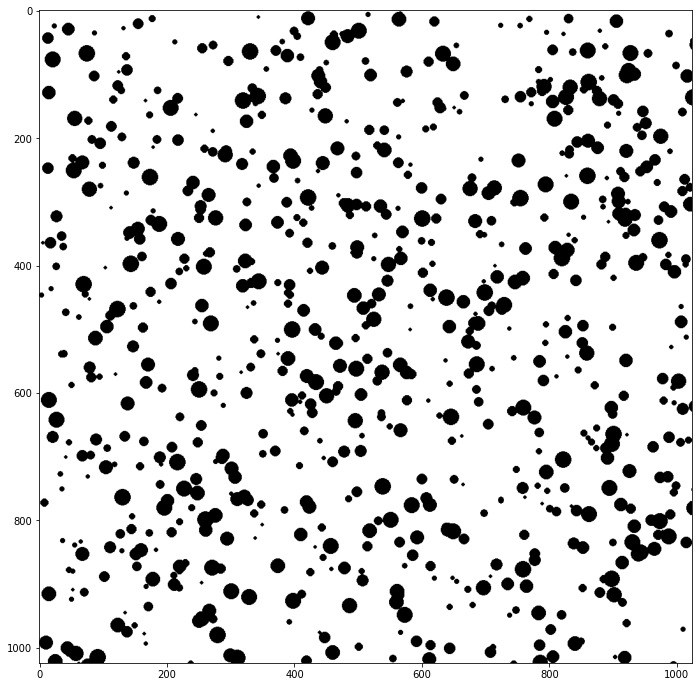

In [28]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy
from random import randint, seed

# Create white canvas and get drawing context
w, h = 1024, 1024
img  = Image.new('RGB', (w, h), color = 'white')
draw = ImageDraw.Draw(img)

# Draw a random number of circles between 300-800
cmin = randint(200, 300)
cmax = randint(600,1000)
for _ in range(cmin,cmax):
    diam = randint(5,25)
    x, y = randint(0,w), randint(0,h)
    draw.ellipse([x,y,x+diam,y+diam], fill='black')

fig = plt.figure(figsize=(16, 12))
# Save result
plt.imshow(img)

In [54]:
def dot_texture(width=1024, height=1024, min_diameter=10, max_diameter=20, n_dots=900):
    img  = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    
    for _ in range(n_dots):
        x, y = np.random.randint(0,width), np.random.randint(0,height)
        diam = np.random.randint(min_diameter, max_diameter)
        draw.ellipse([x,y,x+diam,y+diam], fill='black')
    
    return img

In [52]:
plt.rcParams["savefig.dpi"] = 'figure'

In [55]:
img = dot_texture(min_diameter=2, max_diameter=10, n_dots=4000)
img.save('test_background.jpg')